<a href="https://colab.research.google.com/github/SebastianPerezCalle/Se-ales-y-Sistemas/blob/main/PARCIAL1%3A%202024-2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Simulación inicial con frecuencia de muestreo inadecuada:
ADVERTENCIA: La frecuencia de muestreo (5000 Hz) no cumple con Nyquist (debe ser ≥ 11000 Hz).


TypeError: stem() got an unexpected keyword argument 'use_line_collection'

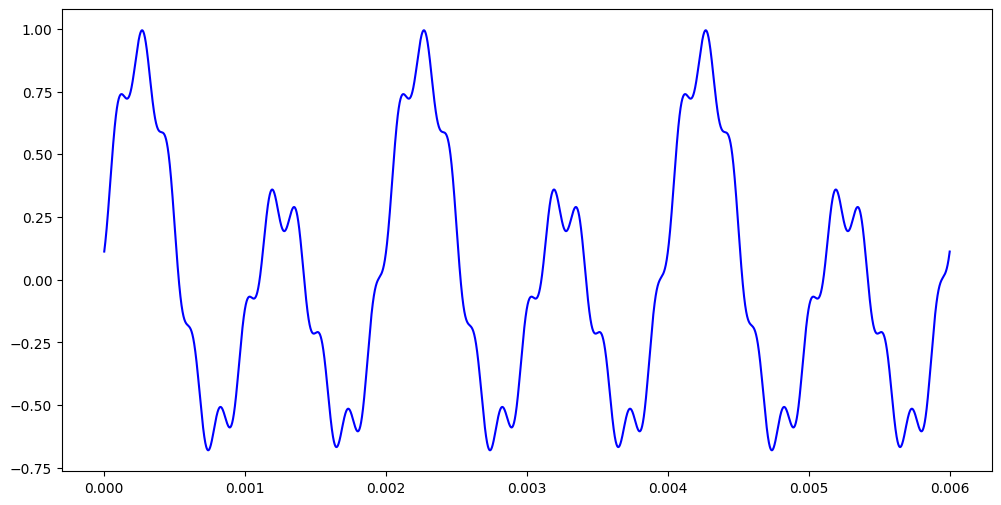

In [ ]:

##SEBASTIAN PEREZ CALLE - 10072276578


import numpy as np
import matplotlib.pyplot as plt

# Definición de la señal continua x(t)
def x_t(t):
    """
    Función de la señal continua.
    x(t) = 0.3cos(1000πt - π/4) + 0.6sin(2000πt) + 0.1cos(11000πt - π)
    """
    return (
        0.3 * np.cos(1000 * np.pi * t - np.pi / 4)
        + 0.6 * np.sin(2000 * np.pi * t)
        + 0.1 * np.cos(11000 * np.pi * t - np.pi)
    )

# Función para simular el proceso de digitalización
def adc_simulation(f_s, bits, Vmin, Vmax, duration, display_warning=True):
    """
    Simula el proceso de muestreo y cuantización de una señal.

    Parámetros:
    - f_s: Frecuencia de muestreo (Hz)
    - bits: Resolución del ADC en bits
    - Vmin, Vmax: Rango del ADC (V)
    - duration: Duración de la señal (s)
    - display_warning: Si True, muestra advertencias sobre aliasing
    """
    # Definir las componentes de frecuencia de la señal
    f_max = 5500  # Frecuencia más alta (Hz)

    # Verificar el criterio de Nyquist
    if display_warning and f_s < 2 * f_max:
        print(f"ADVERTENCIA: La frecuencia de muestreo ({f_s} Hz) no cumple con Nyquist (debe ser ≥ {2 * f_max} Hz).")

    # Generar la señal continua
    t_cont = np.linspace(0, duration, 10000)  # Resolución alta para la señal continua
    x_cont = x_t(t_cont)

    # Muestreo
    t_sampled = np.arange(0, duration, 1 / f_s)
    x_sampled = x_t(t_sampled)

    # Cuantización
    levels = 2**bits  # Niveles de cuantización
    quantization_step = (Vmax - Vmin) / levels
    x_quantized = np.clip(np.round((x_sampled - Vmin) / quantization_step) * quantization_step + Vmin, Vmin, Vmax)

    # Gráficos
    plt.figure(figsize=(12, 6))

    # Señal continua
    plt.plot(t_cont, x_cont, label="Señal continua $x(t)$", color="blue")

    # Señal muestreada
    plt.stem(t_sampled, x_sampled, linefmt="orange", markerfmt="ro", basefmt=" ", label="Señal muestreada", use_line_collection=True)

    # Señal cuantizada
    plt.step(t_sampled, x_quantized, where="mid", color="green", label="Señal cuantizada (digitalizada)")

    plt.title(f"Digitalización con $f_s$ = {f_s} Hz, {bits} bits")
    plt.xlabel("Tiempo (s)")
    plt.ylabel("Amplitud (V)")
    plt.legend()
    plt.grid()
    plt.show()


# Simulación inicial
print("Simulación inicial con frecuencia de muestreo inadecuada:")
adc_simulation(f_s=5000, bits=5, Vmin=-3.3, Vmax=3.3, duration=3/500)

# Simulación mejorada
print("\nSimulación mejorada con frecuencia de muestreo adecuada:")
adc_simulation(f_s=12000, bits=5, Vmin=-3.3, Vmax=3.3, duration=3/500)

# Experimentación con parámetros ajustables
print("\nExperimenta con tus propios parámetros:")
f_s_custom = float(input("Ingrese la frecuencia de muestreo (Hz): "))
bits_custom = int(input("Ingrese la cantidad de bits del ADC: "))
Vmin_custom = float(input("Ingrese el valor mínimo del rango del ADC (V): "))
Vmax_custom = float(input("Ingrese el valor máximo del rango del ADC (V): "))
adc_simulation(f_s=f_s_custom, bits=bits_custom, Vmin=Vmin_custom, Vmax=Vmax_custom, duration=3/500)
